# Analysing Earthquake Data with Seis.jl and Plotting Earthquake map with GMT 
1. PART 1: Downloading earthquake traces.
2. PART 2: Plotting earthquake traces.
3. PART 3: Map Plotting in GMT
4. PART 4: Focal Mechanism of Earthquake.

# **PART 1**. Downloading earthquake data using SeisRequests

In [1]:
using Seis,Seis.Plot,Plots     #importing the required library
using SeisRequests,SeisTau
using Dates,DSP
#using Images

In [9]:
ev=get_events(starttime="2011-11-06T00:00:00.00",endtime="2012-01-06T09:00:40.00",minmagnitude=5.5,latitude=46.36,
longitude=-127.41,maxradius=90.0,minradius=30.0,server="IRIS")

┌ Info: Request status: Successful request, results follow
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:198


28-element Vector{GeogEvent{Float64}}:
 Event: lon: -70.4202, lat: 18.2745, dep: 34.0, time: 2012-01-05T09:35:31, id: smi:service.iris.edu/fdsnws/event/1/query?originid=5621806, meta: 8 keys
 Event: lon: -173.2179, lat: -17.9907, dep: 26.0, time: 2012-01-05T01:13:38.120, id: smi:service.iris.edu/fdsnws/event/1/query?originid=5621426, meta: 8 keys
 Event: lon: 138.1834, lat: 31.4682, dep: 359.7, time: 2012-01-01T05:27:55.800, id: smi:service.iris.edu/fdsnws/event/1/query?originid=5616466, meta: 8 keys
 Event: lon: 95.9643, lat: 51.8349, dep: 12.8, time: 2011-12-27T15:21:57.570, id: smi:service.iris.edu/fdsnws/event/1/query?originid=5610579, meta: 8 keys
 Event: lon: 168.8045, lat: -19.1715, dep: 54.6, time: 2011-12-26T16:12:34.180, id: smi:service.iris.edu/fdsnws/event/1/query?originid=5609496, meta: 8 keys
 Event: lon: -173.7235, lat: -16.112, dep: 66.9, time: 2011-12-26T04:48:06.170, id: smi:service.iris.edu/fdsnws/event/1/query?originid=5608952, meta: 8 keys
 Event: lon: -176.5705, l

In [11]:
ev[1]

Seis.Event{Float64,Seis.Geographic{Float64}}:
        lon: -70.4202
        lat: 18.2745
        dep: 34.0
       time: 2012-01-05T09:35:31
         id: smi:service.iris.edu/fdsnws/event/1/query?originid=5621806
       meta: type => "earthquake"
             quakeml => QuakeML.Event
  description: Array{QuakeML.EventDescription}((1,))
  comment: Array{QuakeML.Comment}((0,))
  focal_mechanism: Array{QuakeML.FocalMechanism}((0,))
  amplitude: Array{QuakeML.Amplitude}((0,))
  magnitude: Array{QuakeML.Magnitude}((1,))
  station_magnitude: Array{QuakeML.StationMagnitude}((0,))
  origin: Array{QuakeML.Origin}((1,))
  pick: Array{QuakeML.Pick}((0,))
  preferred_origin_id: QuakeML.ResourceIdentifier
  preferred_magnitude_id: QuakeML.ResourceIdentifier
  preferred_focal_mechanism_id: Missing missing
  type: QuakeML.EventType
  type_certainty: Missing missing
  creation_info: Missing missing
  public_id: QuakeML.ResourceIdentifier

             author => "ISC"
             mag_type => "MW"
     

In [8]:
#newsta=get_stations(ev[2],network="7D",station="J67A",channel="BH?",server="IRIS")
@show stm=ev[2].time
@show etm=stm + Second(1000)

stm = (ev[2]).time = DateTime("2006-03-05T08:07:57.070")
etm = stm + Second(1000) = DateTime("2006-03-05T08:24:37.070")


2006-03-05T08:24:37.070

In [7]:
sta1=get_data(code="7D.J67A..BHZ",starttime=stm,endtime=etm,server="IRIS")

┌ Info: Request status: Request was properly formatted and submitted but no data matches the selection
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:235


Trace{Float64, Vector{Float64}, Seis.Geographic{Float64}}[]

In [27]:
newsta

3-element Vector{GeogStation{Float64}}:
 Station: II.RAYN.10.BH1, lon: 45.5032, lat: 23.5225, dep: 0.007, elev: 631.0, azi: 176.2, inc: 90.0, meta: 4 keys
 Station: II.RAYN.10.BH2, lon: 45.5032, lat: 23.5225, dep: 0.007, elev: 631.0, azi: 266.2, inc: 90.0, meta: 4 keys
 Station: II.RAYN.10.BHZ, lon: 45.5032, lat: 23.5225, dep: 0.007, elev: 631.0, azi: 0.0, inc: 0.0, meta: 4 keys

In [92]:
sta1=get_data(ev[2],newsta,Second(0),Minute(20),server="IRIS")


┌ Info: Request status: Successful request, results follow
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:235


3-element Vector{Trace{Float64, Vector{Float64}, Seis.Geographic{Float64}}}:
 Seis.Trace(II.RAYN.10.BH1: delta=0.025, b=0.007538, nsamples=48000)
 Seis.Trace(II.RAYN.10.BH2: delta=0.025, b=0.007538, nsamples=48000)
 Seis.Trace(II.RAYN.10.BHZ: delta=0.025, b=0.007538, nsamples=48000)

In [93]:
add_picks!(sta1[3],"P")


Seis.SeisDict{Union{Int64, Symbol}, Seis.Pick{Float64}} with 5 entries:
  :P   => Seis.Pick{Float64}(time=218.18727674048165, name="P")
  :P_2 => Seis.Pick{Float64}(time=218.54396657887983, name="P")
  :P_4 => Seis.Pick{Float64}(time=222.85376021721433, name="P")
  :P_1 => Seis.Pick{Float64}(time=218.41745676534262, name="P")
  :P_3 => Seis.Pick{Float64}(time=222.72017927948323, name="P")

In [94]:
pk=picks(sta1[3],"P")
arr=pk[1].time

218.18727674048165

In [95]:
cut!(sta1[3],arr,arr+900)

Seis.Trace{Float64,Vector{Float64},Seis.Geographic{Float64}}:
            b: 218.18253800000002
        delta: 0.025
 GeogStation{Float64}:
      sta.lon: 45.5032
      sta.lat: 23.5225
      sta.dep: 0.007
      sta.net: II
      sta.sta: RAYN
      sta.loc: 10
      sta.cha: BHZ
     sta.elev: 631.0
      sta.azi: 0.0
      sta.inc: 0.0
     sta.meta: Seis.SeisDict{Symbol, Any}(:startdate => DateTime("2018-01-27T08:55:00"), :request => FDSNStation(starttime=DateTime("2023-02-06T01:17:34.362"), endtime=DateTime("2023-02-06T01:17:34.362"), network="II", station="RAYN", location="10", channel="BH?", level="channel", nodata=204), :server => "IRIS", :stationxml => StationXML.FDSNStationXML
  source: String "IRIS-DMC"
  sender: String "IRIS-DMC"
  module_name: String "IRIS WEB SERVICE: fdsnws-station | version: 1.1.52"
  module_uri: String "http://service.iris.edu/fdsnws/station/1/query?starttime=2023-02-06T01:17:34.362&endtime=2023-02-06T01:17:34.362&network=II&station=RAYN&location=10&ch

In [96]:
 bandpass!.(sta1[3],0.08,3.0;twopass=true,kind=DSP.Butterworth(4))

Seis.Trace{Float64,Vector{Float64},Seis.Geographic{Float64}}:
            b: 218.18253800000002
        delta: 0.025
 GeogStation{Float64}:
      sta.lon: 45.5032
      sta.lat: 23.5225
      sta.dep: 0.007
      sta.net: II
      sta.sta: RAYN
      sta.loc: 10
      sta.cha: BHZ
     sta.elev: 631.0
      sta.azi: 0.0
      sta.inc: 0.0
     sta.meta: Seis.SeisDict{Symbol, Any}(:startdate => DateTime("2018-01-27T08:55:00"), :request => FDSNStation(starttime=DateTime("2023-02-06T01:17:34.362"), endtime=DateTime("2023-02-06T01:17:34.362"), network="II", station="RAYN", location="10", channel="BH?", level="channel", nodata=204), :server => "IRIS", :stationxml => StationXML.FDSNStationXML
  source: String "IRIS-DMC"
  sender: String "IRIS-DMC"
  module_name: String "IRIS WEB SERVICE: fdsnws-station | version: 1.1.52"
  module_uri: String "http://service.iris.edu/fdsnws/station/1/query?starttime=2023-02-06T01:17:34.362&endtime=2023-02-06T01:17:34.362&network=II&station=RAYN&location=10&ch

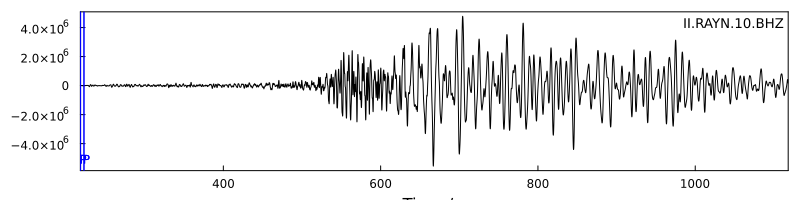

In [97]:
plot(sta1[3],wsize=(800,200))


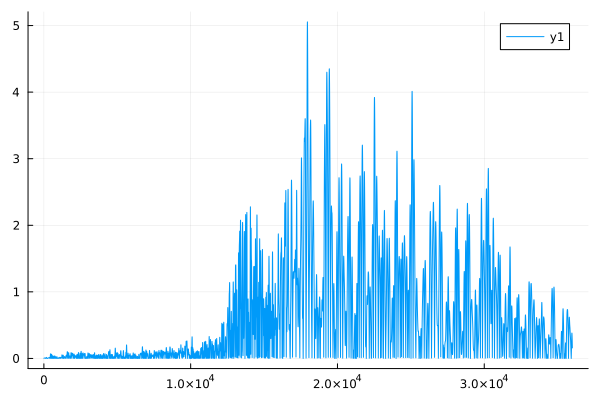

In [83]:
using Statistics
tr1=trace(sta1[3])
sd1=std(tr1)
tr2= tr1 ./ sd1
tk1=abs.(tr2)
plot(tk1)

In [44]:
length(tr2)

48000

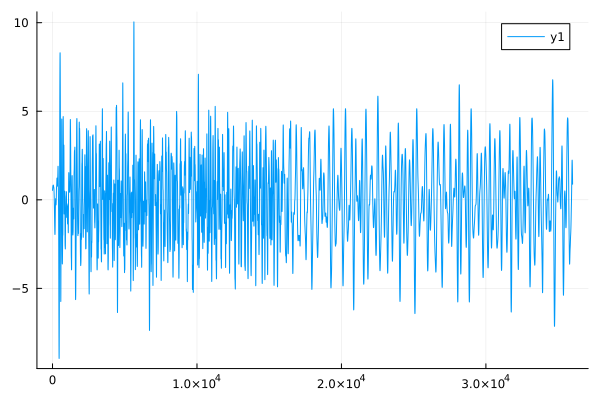

In [84]:
using EasyFit
tk2=movavg(tk1,1000)
plot(tk2.x)
m1=maximum(tk2.x)
val=[m1/i for i in tk2.x]
vx=[tr2[i]*val[i] for i in 1:length(tr2)]
plot(vx)

In [71]:
using WAV

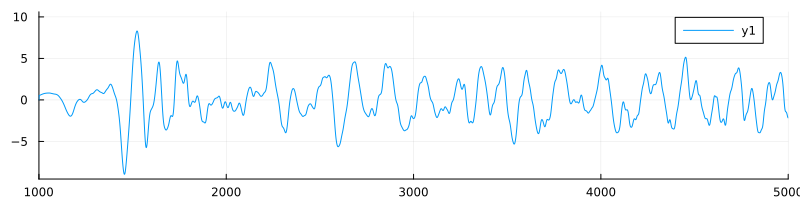

In [91]:
nll=zeros(1000)
dat=cat(nll,vx,dims=1)
    plot(dat,xlim=(1000,5000),wsize=(800,200))


In [73]:
1/0.025

40.0

In [90]:
wavwrite(vx,"eartwav",Fs=40)

In [2]:
SeisRequests.server_list()

9-element Vector{String}:
 "ISC"
 "NEIC"
 "INGV"
 "IPGP"
 "NCEDC"
 "SCEDC"
 "Geofon"
 "Orfeus"
 "IRIS"

## Request for Events occuring between StartTime and EndTime from IRIS Server

In [3]:
ev=get_events(starttime="2014-03-21T13:40:30.00",endtime="2014-03-21T13:45:40.00",minmagnitude=6,latitude=7.0,
longitude=94.0,maxradius=5.0,server="IRIS")

┌ Info: Request status: Successful request, results follow
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:198


1-element Vector{GeogEvent{Float64}}:
 Event: lon: 94.2252, lat: 7.6804, dep: 19.3, time: 2014-03-21T13:41:09.860, id: smi:service.iris.edu/fdsnws/event/1/query?originid=21193107, meta: 8 keys

## Request for Stations that recorded the earthquake event. 

In [297]:
newsta=get_stations(ev[1],network="II",station="UOSS",location="10",channel="BH?",server="IRIS")

┌ Info: Request status: Successful request, results follow
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:198


3-element Vector{GeogStation{Float64}}:
 Station: II.UOSS.10.BH1, lon: 56.2042, lat: 24.9453, dep: 0.0, elev: 284.4, azi: 1.0, inc: 90.0, meta: 5 keys
 Station: II.UOSS.10.BH2, lon: 56.2042, lat: 24.9453, dep: 0.0, elev: 284.4, azi: 91.0, inc: 90.0, meta: 5 keys
 Station: II.UOSS.10.BHZ, lon: 56.2042, lat: 24.9453, dep: 0.0, elev: 284.4, azi: 0.0, inc: 0.0, meta: 5 keys

## Request for Traces from StartTime and EndTime 

In [5]:
sta1=get_data(code="II.UOSS.10.BH?",starttime="2014-03-21T13:40:30.00",endtime="2014-03-21T14:40:30.00")

┌ Info: Request status: Successful request, results follow
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:235


3-element Vector{Trace{Float64, Vector{Float64}, Seis.Geographic{Float64}}}:
 Seis.Trace(II.UOSS.10.BH1: delta=0.025, b=0.0005, nsamples=144000)
 Seis.Trace(II.UOSS.10.BH2: delta=0.025, b=0.0005, nsamples=144000)
 Seis.Trace(II.UOSS.10.BHZ: delta=0.025, b=0.0005, nsamples=144000)

# **PART 2**: Plotting Eartquake traces

## This plot the 3 traces BHE,BHN,BHZ 

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, legend_font_rotation, legend_font_valign, legend_foreground_color, legend_positio

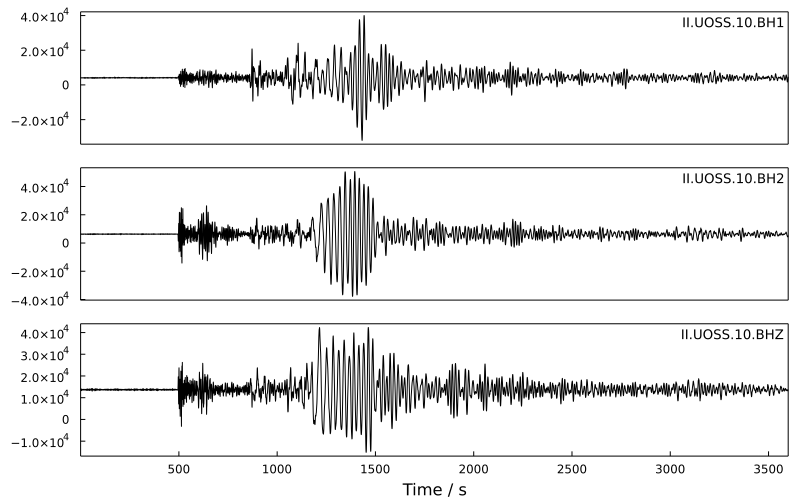

In [8]:
plot(sta1,wsize=(800,500))

## Bandpass Filtering between 0.05 - 1.0 Hz.

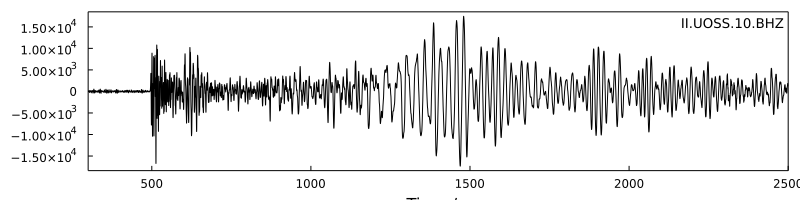

In [288]:
tr=bandpass(sta1[3],0.05,1.0,poles=2,twopass=false)
plot(tr,wsize=(800,200),xlim=(300,2500))

In [11]:
sta1[1]    #stations and event meta data.

Seis.Trace{Float64,Vector{Float64},Seis.Geographic{Float64}}:
            b: 0.0005
        delta: 0.025
 GeogStation{Float64}:
      sta.net: II
      sta.sta: UOSS
      sta.loc: 10
      sta.cha: BH1
     sta.meta: Seis.SeisDict{Symbol, Any}()
 GeogEvent{Float64}:
     evt.time: 2014-03-21T13:40:30.019
     evt.meta: Seis.SeisDict{Symbol, Any}()
 Trace:
        picks: 0
         meta: server => "IRIS"

In [12]:
distance_deg(ev[1],newsta[1]) #calculate the distance of the event and station in km.

41.50841402846511

## Requesting more earthquake data for different stations
*This can take some time.*


In [291]:
sta2=get_data(code="AU.MEEK..BH?",starttime="2014-03-21T13:37:30.00",endtime="2014-03-21T14:40:30.00",server="IRIS");
sta3=get_data(code="PS.PSI..BH?",starttime="2014-03-21T13:37:30.00",endtime="2014-03-21T14:40:30.00",server="IRIS");
sta4=get_data(code="YB.AT64..BH?",starttime="2014-03-21T13:37:30.00",endtime="2014-03-21T14:40:30.00",server="IRIS");
sta5=get_data(code="NR.NE220..BH?",starttime="2014-03-21T13:37:30.00",endtime="2014-03-21T14:40:30.00",server="IRIS");


┌ Info: Request status: Successful request, results follow
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:235
┌ Info: Request status: Successful request, results follow
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:235
┌ Info: Request status: Successful request, results follow
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:235
┌ Info: Request status: Successful request, results follow
└ @ SeisRequests /home/rengneichuong/.julia/packages/SeisRequests/25wn4/src/SeisRequests.jl:235


## Plotting the vertical component traces to see the first motion of P wave.

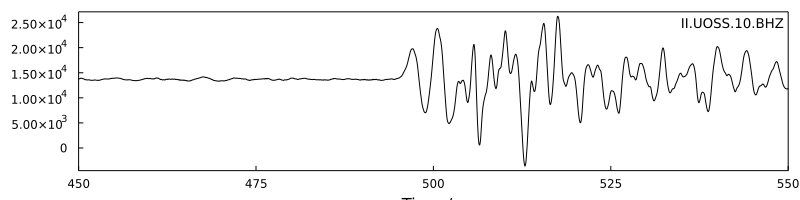

In [252]:
p1=plot(sta1[3],xlim=(450,550),wsize=(800,200))

In [286]:
p2=plot(sta2[3],xlim=(650,750),wsize=(800,200))
p3=plot(sta3[3],xlim=(300,350),wsize=(800,200))
p4=plot(sta4[3],xlim=(800,900),wsize=(800,200))
p5=plot(sta5[3],xlim=(850,950),wsize=(800,200));

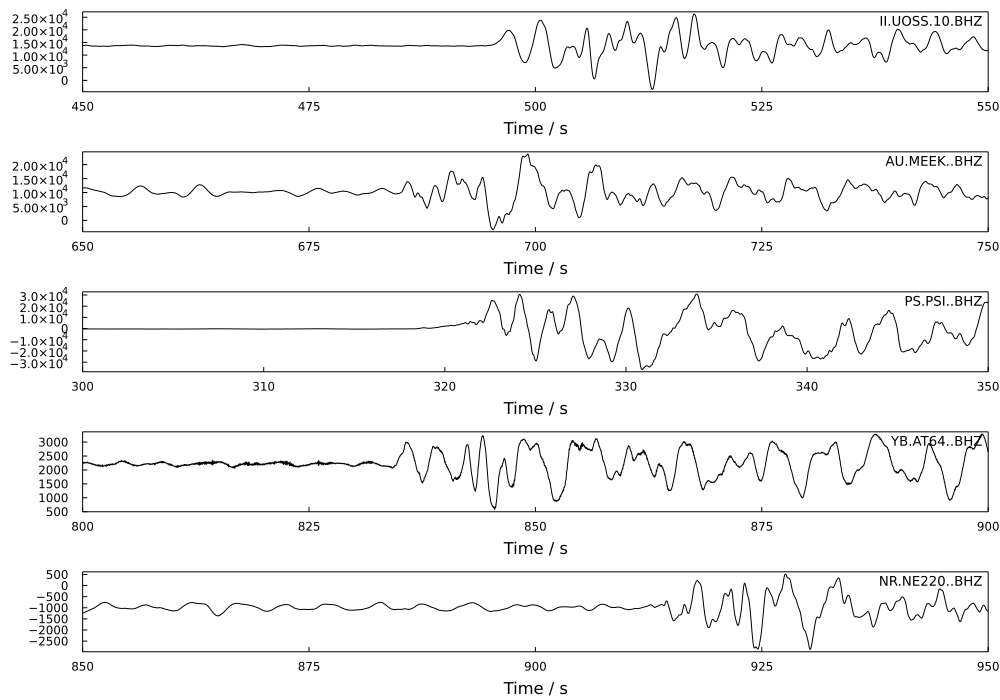

In [274]:
plot(p1,p2,p3,p4,p5,layout=(5,1),wsize=(1000,700))
savefig("time.png")
load("time.png")

# **PART 3**: GMT Map Plotting.
## * Requirement: GMT installed on Ubuntu desktop *
* Installation: 
`sudo apt-get install gmt gmt-dcw gmt-gshhg`
* Required:
`sudo apt-get install ghostscript`
* Optional:
`sudo apt-get install gdal-bin graphicsmagick ffmpeg`

*GMT is run as external command using the back tick*

## Creating a text file for Stations and Events position.
Stations:
* II.UOSS.10 (lon: 56.2042, lat: 24.9453)
* AU.MEEK (lon: 118.613503, lat: -26.6376)
* PS.PSI  (lon: 98.923698, lat: 2.6938)
* YB.AT64 (lon: 34.1213, lat: 36.601299)
* NR.NE220 (lon: 25.85961, lat: -23.363029)
* Event: lon: 94.2252, lat: 7.6804 Mag=6.4  Strike,Dip,Rake=(61 80 -15) Depth=19.2 Km

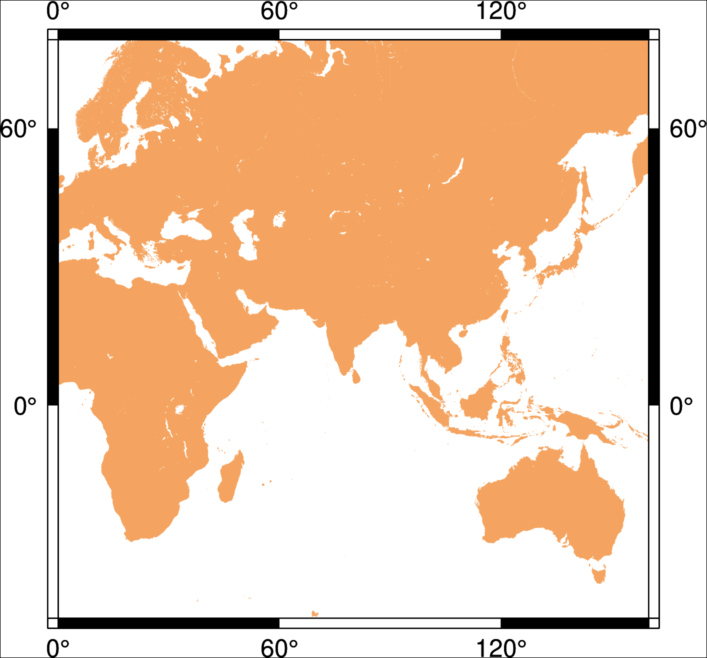

In [292]:
run(`gmt pscoast -R0/160/-50/70 -JM10a -B10a -Gsandybrown -K '>' world.ps`)  
run(`gmt psbasemap -R0/160/-50/70 -JM10a -B10a -O '>>' world.ps`)
run(`gmt psconvert world.ps -A -Tg`)
load("world.png")

In [147]:
touch("station_pos.txt")

"station_pos.txt"

## Text file format for station location:
* Column 1,2 : Longitude Latitude
* Column 3 : Fontsize number,FontStyle number
* Column 4 : Justify
* Column 5,6,7: Text

In [229]:
rt=open("station_pos.txt","w")
write(rt,
"56.2042 24.9453 5,0 CB II UOSS 10   
118.613 -26.63 5,0 CB AU MEEK
98.92 2.69 5,0 CB PS PSI
34.12 36.60 5,0 CB YB AT64
25.859 -23.363 5,0 CB NR NE220"
    )
close(rt)

# **PART 4**: Plotting focal mechanism.

In [117]:
touch("event_pos.txt")

"event_pos.txt"

## Text file format for plotting focal mechanism.(Aki and Richards convention)
* Cloumn 1,2: Lon Lat
* Column 3: Depth
* Column 4,5,6: Strike Dip Rake
* Column 7 : Magnitude
* Column 8: 0,0 (Location of beach ball; (0,0) if the location is same as in Col. 1,2)
* Column 9: Text

In [171]:
er=open("events_pos.txt","w")
write(er,
"94.2252 7.6804 19.2 61 80 -15 6.4 0,0 Andaman Nicobar")
close(er)

## Plotting Stations(Triangle) and Event(Beach Ball)


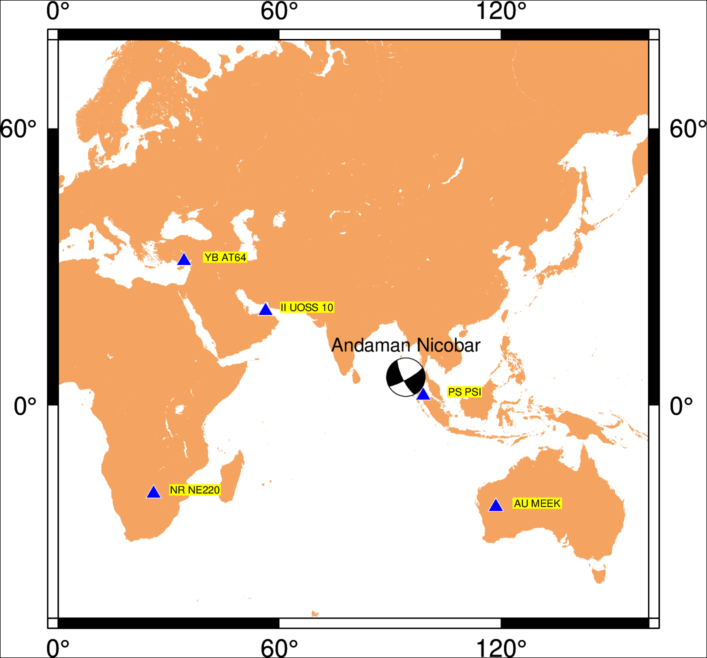

In [293]:
run(`gmt pscoast -R0/160/-50/70 -JM10a -B10a -Gsandybrown -K '>' map.ps`)
run(`gmt psbasemap -R0/160/-50/70 -JM10a -B10a -K -O '>>' map.ps`)
run(`gmt psxy station_pos.txt -R0/160/-50/70 -JM10a -St0.3c -W0.2p,white -Gblue -O -K '>>' map.ps`)  #plotting stations
run(`gmt pstext station_pos.txt -R0/160/-50/70 -JM10a -Gyellow -D0.7c/0c -F+f+j -O -K '>>' map.ps`)  #plotting stations name
run(`gmt psmeca events_pos.txt -R0/160/-50/70 -JM10a -Sa0.2i  -O '>>' map.ps`)                       #plotting focal mecganism(beach ball)
run(`gmt psconvert map.ps -A -Tg`)
load("map.png")

# First Motion of P wave at different stations around the epicenter (Andaman Nicobar Island)

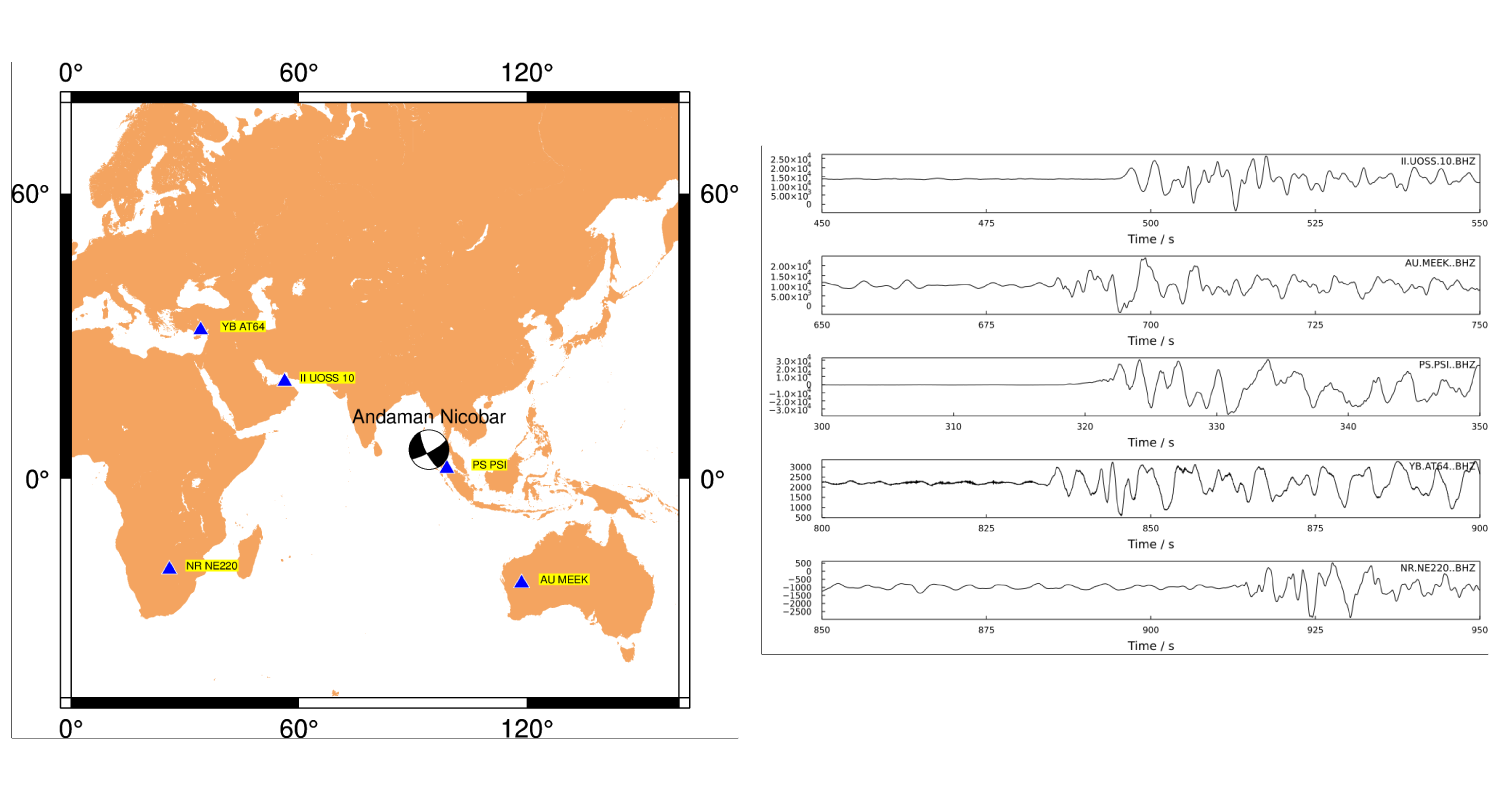

In [284]:
plot1=plot(load("map.png"),xticks=false,yticks=false)
plot2=plot(load("time.png"),xticks=false,yticks=false)
plot(plot1,plot2,layout=(1,2),wsize=(1500,800))
